In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pprint

# !rm "../../results/arousal--model_fusion_0.3432.dat"
path = "../../results/"
!ls "../../results/"

20180201-214213--arousal--model_fusion_0.6983.dat
20180202-074754--arousal--model_fusion_0.6745.dat
audio-with-out-cv.dat
early-with-out-cv.dat
early-with-out-cv-latest.dat
fusion-with-cv-200-layer.dat
fusion-with-cv.dat
fusion-with-out-cv-200-layer.dat
fusion-with-out-cv.dat
fusion-with-out-cv-latest.dat


In [4]:
fusion = "20180202-074754--arousal--model_fusion_0.6745.dat"
early = "early-with-out-cv.dat"

data_fusion = None
with open(path + fusion,'r') as f:  
    data_fusion = pickle.load(f)

data_early = None
with open(path + early,'r') as f:
    data_early = pickle.load(f)


In [5]:
for d in data_fusion:
    print(d['test_ccc'] , d['space']['fusion_layers'])

0.6606810986995697 [([150, 150], 0.2), ([50, 50], 0.4)]
0.6812635809183121 [([150, 150], 0.2), ([50, 50], 0.4)]
0.6745003461837769 [([150, 150], 0.2), ([50, 50], 0.4)]
0.6983457605044047 [([150, 150], 0.2), ([50, 50], 0.4)]
0.701464401351081 [([150, 150], 0.2), ([50, 50], 0.4)]
0.694100429614385 [([150, 150], 0.2), ([50, 50], 0.4)]


In [6]:
print("Fusion Space : {}".format(data_fusion[0]['space']))
print("Early Space : {}".format(data_early[0]['space']))

Fusion Space : {'delay': 2.8, 'name': 'fusion', 'test_batch_size': 1000, 'fusion_layers': [([150, 150], 0.2), ([50, 50], 0.4)], 'batch_size': 256, 'epochs': 50, 'patience': -1, 'seed': 10, 'lr': 0.01, 'mode': 0, 'win': 1, 'cv': True, 'opt_algo': 'sgd'}
Early Space : {'delay': 2.8, 'name': 'early', 'test_batch_size': 1000, 'fusion_layers': [([150, 150], 0.2), ([50, 50], 0.4)], 'batch_size': 256, 'epochs': 50, 'patience': -1, 'seed': 10, 'lr': 0.01, 'mode': 0, 'win': 1, 'cv': True, 'opt_algo': 'sgd'}


In [7]:
def hyper_average(data, model):
    av = []
    print('#################{}#################'.format(model))
    for hy in data:
        print('loss : {} with seed : {}'.format(hy['test_ccc'], hy['space']['seed']))
        av.append(hy['test_ccc'])
    
    print("Average over hyper parameters losses : {} with STD of : {}".format(sum(av)/len(data), np.std(av)))

hyper_average(data=data_fusion, model="Fusion")
hyper_average(data=data_early, model="Early")

#################Fusion#################
loss : 0.6606810987 with seed : 10
loss : 0.681263580918 with seed : 62
loss : 0.674500346184 with seed : 99
loss : 0.698345760504 with seed : 142
loss : 0.701464401351 with seed : 13
loss : 0.694100429614 with seed : 64
Average over hyper parameters losses : 0.685059269545 with STD of : 0.0144198653222
#################Early#################
loss : 0.694143932727 with seed : 10
loss : 0.706263108386 with seed : 62
loss : 0.701425537467 with seed : 99
loss : 0.694229478637 with seed : 142
loss : 0.699839701255 with seed : 13
loss : 0.693907552295 with seed : 64
Average over hyper parameters losses : 0.698301551795 with STD of : 0.0046311694224


In [13]:
def average_fusion_parameters(cv):
    i = []
    o = []
    alpha_0 = []
    alpha_1 = []
    w_0 = []
    w_1 = []
    w_2 = []
    

    l = len(cv)
    for cvf in cv:
        bmi = cvf['cross_valid'][0]
        bmi = bmi['best_model_inter']
        i.append(np.absolute(np.asarray(bmi['inputs'])))
        o.append(np.absolute(np.asarray(bmi['outputs'])))
        for idx, f in enumerate(bmi['fusion_layers']):
            if idx == 0:
                alpha_0.append(np.absolute(np.asarray(f['alpha'])))
                w_0.append(np.asarray(f['weights']))
            elif idx == 1:
                alpha_1.append(np.absolute(np.asarray(f['alpha'])))
                w_1.append(np.asarray(f['weights']))
            elif idx == 2:
                w_2.append(np.asarray(f['weights']))
    
    average_input = sum(i)/float(l)
    average_output = sum(o)/float(l)

    input_std = np.std(i, axis=0)
    output_std = np.std(o, axis=0)
    
    average_alpha_0 = sum(alpha_0)/float(l)
    average_alpha_1 = sum(alpha_1)/float(l)
    
    alpha_0_std = np.std(alpha_0, axis=0)
    alpha_1_std = np.std(alpha_1, axis=0)
    
    average_w_0 = sum(w_0)/float(l)
    average_w_1 = sum(w_1)/float(l)
    average_w_2 = sum(w_2)/float(l)
    
    w_0_std = np.std(w_0, axis=0)
    w_1_std = np.std(w_0, axis=0)
    w_2_std = np.std(w_0, axis=0)
    
    print("input average : {} and std : {}".format(average_input, input_std))
    print("output average : {} and std : {}".format(average_output, output_std))
    print("a_0 average : {} and std : {}".format(average_alpha_0, alpha_0_std))
    print("w_0 average : {} and std : {}".format(average_w_0, w_0_std))
    print("a_1 average : {} and std : {}".format(average_alpha_1, alpha_1_std))
    print("w_1 average : {} and std : {}".format(average_w_1, w_1_std))
    print("w_2 average : {} and std : {}".format(average_w_2, w_2_std))
    
average_fusion_parameters(data_fusion)

input average : [0.7565295 0.7526233] and std : [0.21074784 0.31958708]
output average : [0.06998045 0.015928   0.1680063 ] and std : [0.02962846 0.01206702 0.14090924]
a_0 average : [0.8108208 0.6710538] and std : [0.6123981 0.3197286]
w_0 average : [0.58915395 0.57862514 0.57439804] and std : [0.02539824 0.00684322 0.00452941]
a_1 average : [0.5171177 0.6047594] and std : [0.34997845 0.42560166]
w_1 average : [0.5926521 0.560937  0.5722701] and std : [0.02539824 0.00684322 0.00452941]
w_2 average : [0.47561955 0.50521475 0.5436449 ] and std : [0.02539824 0.00684322 0.00452941]


In [5]:
index = 0
cv = 0
data_early = data_early[index]['cross_valid'][cv]
data_fusion = data_fusion[index]['cross_valid'][cv]

In [6]:
def calc_scores ( x, y ):
    x_mean = np.nanmean(x)
    y_mean = np.nanmean(y)
    
    covariance = np.nanmean((x-x_mean)*(y-y_mean))
    
    x_var = 1.0 / (len(x)-1) * np.nansum((x-x_mean)**2) # Make it consistent with Matlab's nanvar (division by len(x)-1, not len(x)))
    y_var = 1.0 / (len(y)-1) * np.nansum((y-y_mean)**2)
    
    CCC = (2*covariance) / (x_var + y_var + (x_mean-y_mean)**2)

    return CCC

Speaker  0
Early CCC:  0.7715355648137795
Fusion CCC:  0.7831001310371558


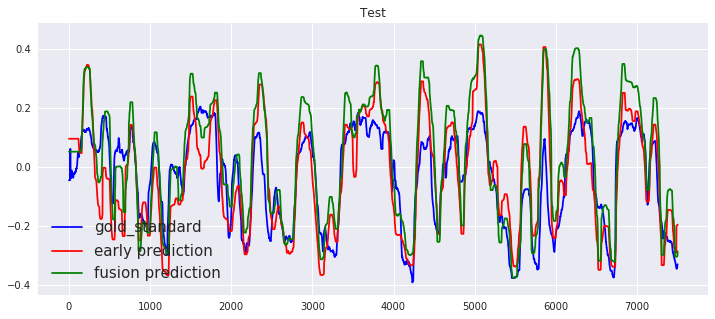

Speaker  1
Early CCC:  0.804341263693065
Fusion CCC:  0.7786722808423904


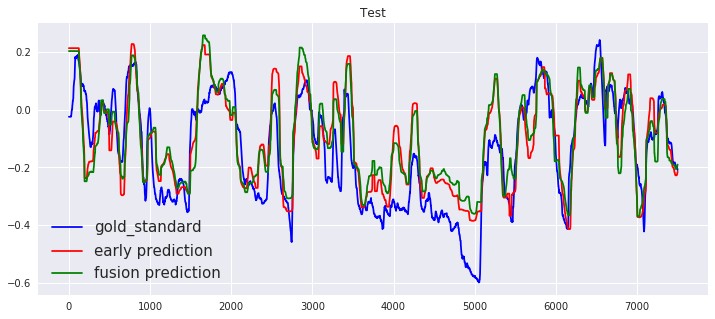

Speaker  2
Early CCC:  0.8302605943450104
Fusion CCC:  0.8190467914324802


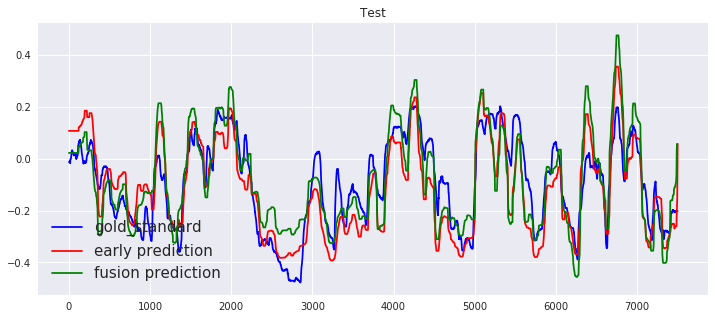

Speaker  3
Early CCC:  0.8191956137539045
Fusion CCC:  0.8635340645692927


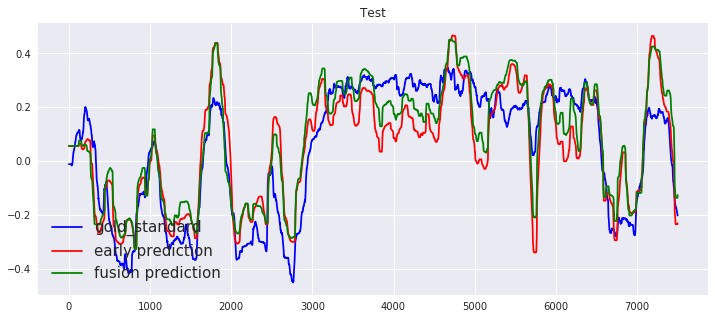

Speaker  4
Early CCC:  0.8168065238847341
Fusion CCC:  0.7372189225168153


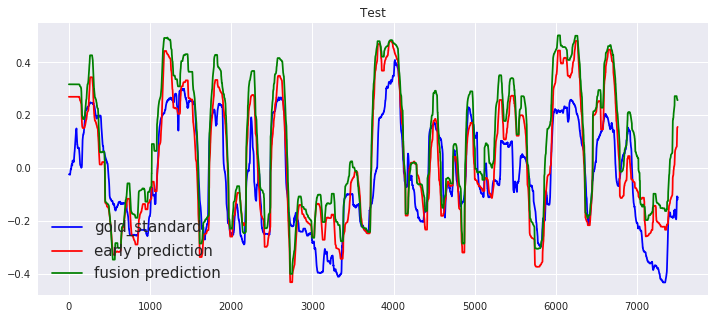

Speaker  5
Early CCC:  0.6944697566506792
Fusion CCC:  0.6078055973120319


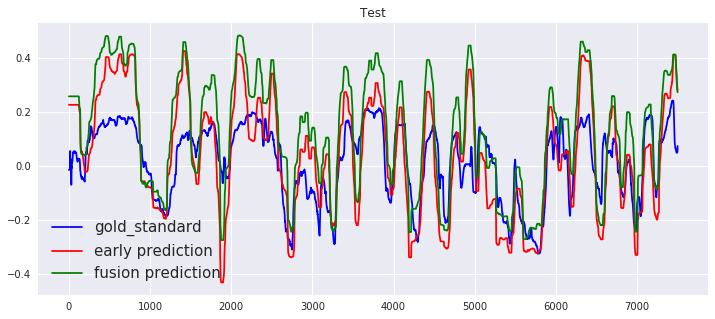

Speaker  6
Early CCC:  0.633178183973049
Fusion CCC:  0.6615375999009124


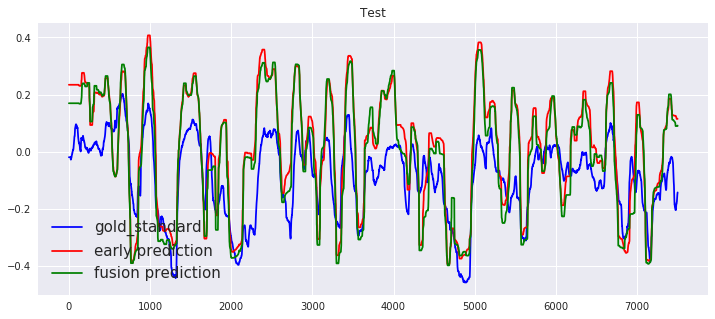

Speaker  7
Early CCC:  0.6999222649003727
Fusion CCC:  0.5764914011933083


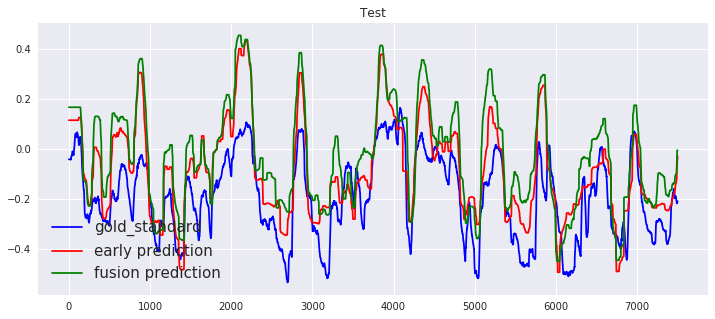

Speaker  8
Early CCC:  0.7426725894460436
Fusion CCC:  0.711718597111242


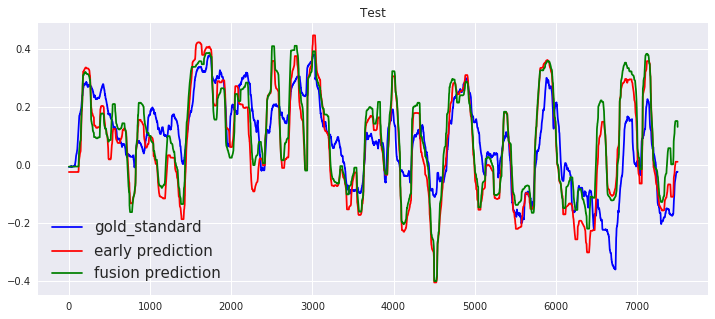

In [7]:
def plot_test_speaker(speaker):

    targe_stats_early = data_early["stats"]["test"]
    targe_stats_fusion = data_fusion["stats"]["test"]
    print("Speaker " , speaker)
    
    print("Early CCC: ", calc_scores(targe_stats_early["results"]["label"][speaker*7501:(speaker+1)*7501], 
                                               targe_stats_early["results"]["pred"][speaker*7501:(speaker+1)*7501]))
    
    print("Fusion CCC: ", calc_scores(targe_stats_fusion["results"]["label"][speaker*7501:(speaker+1)*7501], 
                                               targe_stats_fusion["results"]["pred"][speaker*7501:(speaker+1)*7501]))

    plt.subplots(1, figsize=(12, 5), sharey=True)
    plt.plot(targe_stats_fusion["results"]["label"][speaker*7501:(speaker+1)*7501], 'b', label='gold_standard')
    plt.plot(targe_stats_early["results"]["pred"][speaker*7501:(speaker+1)*7501], 'r', label='early prediction')
    plt.plot(targe_stats_fusion["results"]["pred"][speaker*7501:(speaker+1)*7501], 'g', label='fusion prediction')

    plt.legend(fontsize=15, loc=3)
    plt.title("Test")
    plt.show()

for i in range(0,9):
    plot_test_speaker(i)